# Praktische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

6 oktober 2025


## 1 Classifying the CIFAR10 Dataset

In this exercise we are going to classify images belonging to 10 different classes,namely airplanes, automobiles, birds, cats, deer, dogs, frogs, horses, ships and trucks.

### 1.1 Load the Data

1. Start by loading the dataset. This is a built-in dataset in keras, see https://keras.io/api/datasets/cifar10/#load_data-function for detailed information. Use the following code


In [1]:
import keras as ks

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = ks.datasets.cifar10.load_data()

2. Write code to check shape of the training and the test set. Interpret this shape, i.e. understand what each number means


In [3]:
print("--- Train ---")
print("X_train_full shape", X_train_full.shape)
print("y_train_full shape", y_train_full.shape)
analyse_X_shape = (f"Analyse van de X_train_full {X_train_full.shape}\n" +
                   f"{X_train_full.shape[0]}: aantal items of rijen\n" +
                   f"{X_train_full.shape[1], X_train_full.shape[2]}: spatiale dim. (hoogte & breedte)\n" +
                   f"{X_train_full.shape[3]}: aantal kanalen (RGB"
                   )
print(analyse_X_shape)
print("--- Test ---")
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
analyse_y_shape = (f"Analyse van de Shape {y_train_full.shape}\n" +
                   f"{y_train_full.shape[0]}: aantal items of rijen\n" +
                   f"{y_train_full.shape[1]}: categorie"
                   )
print(analyse_y_shape)

--- Train ---
X_train_full shape (50000, 32, 32, 3)
y_train_full shape (50000, 1)
Analyse van de X_train_full (50000, 32, 32, 3)
50000: aantal items of rijen
(32, 32): spatiale dim. (hoogte & breedte)
3: aantal kanalen (RGB
--- Test ---
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)
Analyse van de Shape (50000, 1)
50000: aantal items of rijen
1: categorie


3. Use the last 10000 examples from the training set as the validation set. The other examples will be used as training set. Write code to create the validation and training data


In [4]:
X_val = X_train_full[-10000:]
y_val = y_train_full[-10000:]
print("--- Val set ---")
print(f"X_val shape: {X_val.shape}")
print(f"y_val shape: {X_val.shape}")
X = X_train_full[:-10000]
y = y_train_full[:-10000]
print("--- Train set ---")
print(f"X shape: {X.shape}")
print(f"X shape: {y.shape}")

--- Val set ---
X_val shape: (10000, 32, 32, 3)
y_val shape: (10000, 32, 32, 3)
--- Train set ---
X shape: (40000, 32, 32, 3)
X shape: (40000, 1)


### 1.2 Some Data Exploration

1. Give the number of examples for each of the ten categories


In [5]:
import numpy as np

categories, counts = np.unique(y, return_counts=True)

for categorie, count in zip(categories, counts):
    print(f"Categorie {categorie}: {count} voorbeelden")

Categorie 0: 3986 voorbeelden
Categorie 1: 3986 voorbeelden
Categorie 2: 4048 voorbeelden
Categorie 3: 3984 voorbeelden
Categorie 4: 4003 voorbeelden
Categorie 5: 3975 voorbeelden
Categorie 6: 4020 voorbeelden
Categorie 7: 4023 voorbeelden
Categorie 8: 3997 voorbeelden
Categorie 9: 3978 voorbeelden


2. Show the first 25 examples in a 5 by 5 grid, each time showing the class(label) of each example along with the image. For your convenience, we give a list containing the class names:


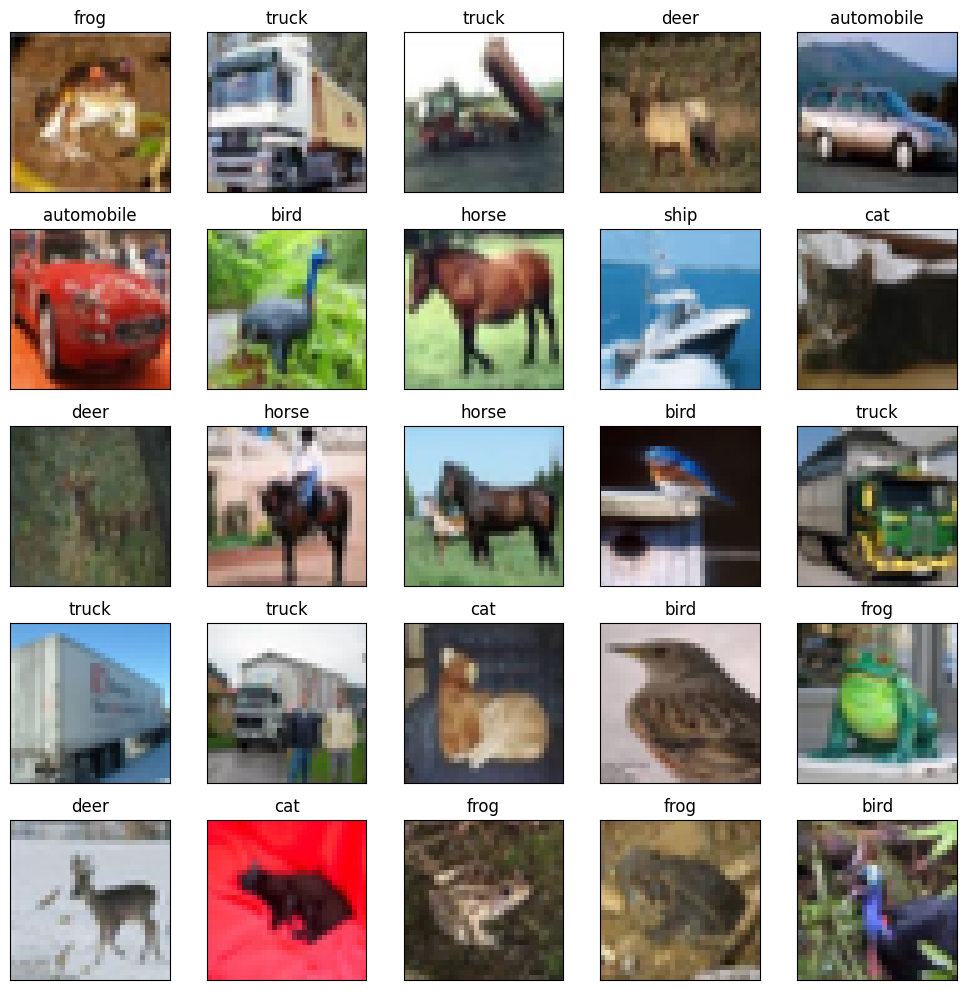

In [6]:
import matplotlib.pyplot as plt

class_names = ["airplane", "automobile", "bird", "cat",
               "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize=(10, 10))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X[i])

    label_index = y_train_full[i][0]
    plt.title(class_names[label_index])

plt.tight_layout()
plt.show()

### 1.3 Build a Model

Build a model using the Sequential API. Write a function `get_model()` that returns a model with the following architecture:

-   An `Input` object that specifies the shape of each image.
-   A `Rescaling` layer which scales the inputs (that are currently between 0 and 255) to the range[0, 1].
-   A `Conv2D` layer with 32 filters, kernel size equal to (3, 3), padding=same and the relu activation function.
-   `Conv2D` layer with 32 filters, kernel size equal to (3, 3), padding=same and the **relu** activation function.
-   A `max pooling` layer with pool size equal to(2, 2).
-   A `Conv2D` layer with 64 filters, kernel size equal to(3, 3), padding=sameand thereluactivation function.
-   A `Conv2D` layer with 64 filters, kernel size equal to(3, 3), padding=sameand the relu activation function.
-   A `max pooling` layer with pool size equal to (2, 2).
-   A `Flatten` layer that transforms each example to a long one dimensional tensor.
-   A `Dense` layer with 128 units and thereluactivation function.
-   A `Dense output` layer.
    -   How many units should this layer have?
    -   What is the most appropriate activation function for this layer, given that we are doing classification into 10 classes?


In [7]:
def get_model():
    return ks.Sequential([
        # * Input shape (32,32,3)
        ks.layers.Input(shape=(32, 32, 3), name="input"),

        # * Rescaling layer [0,1]
        ks.layers.Rescaling(scale=1./255, name="rescale"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2), name="maxpool_1"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2),
                            name="maxpool_2"),

        # * Flatten layer
        ks.layers.Flatten(name="flatten"),

        # * Dense layer
        ks.layers.Dense(units=128,
                        activation="relu",
                        name="dense"),

        # * Output Dense layer
        ks.layers.Dense(units=10,
                        activation="softmax",
                        name="output"),])


model = get_model()
model.summary()

2025-12-25 22:54:43.704509: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-25 22:54:43.704533: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-25 22:54:43.704538: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-25 22:54:43.704554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-25 22:54:43.704563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescale (Rescaling)             │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_1 (MaxPooling2D)        │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ maxpool_2 (MaxPooling2D)        │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,274 (2.26 MB)

 Trainable params: 591,274 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

### 1.4 Compile the Model

1. Compile the model.
    - (a) Use the Adam the optimizer with a learning rate of 1/1000.
    - (b) Specify the correct loss function for this classification problem and track the percentage of correctly classified images


In [8]:
model.compile(
    optimizer=ks.optimizers.Adam(learning_rate=1/1000),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

### 1.5 Train the Model

1. Train the model for a large number of epochs.
2. Use early stopping (and the validation data) to prevent (severe) overfitting.
3. Use the history object returned by the `fit()` method to plot the learning curves. You can use the code given below to plot the learning curves.


Epoch 1/100


2025-12-25 22:54:44.497349: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4641 - loss: 1.4884 - val_accuracy: 0.5465 - val_loss: 1.3157
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5500 - loss: 1.5285 - val_accuracy: 0.5447 - val_loss: 1.7461
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4810 - loss: 12.7642 - val_accuracy: 0.5477 - val_loss: 21.5678
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4643 - loss: 225.6903 - val_accuracy: 0.4530 - val_loss: 537.1002
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4422 - loss: 3744.7981 - val_accuracy: 0.4393 - val_loss: 9550.8193


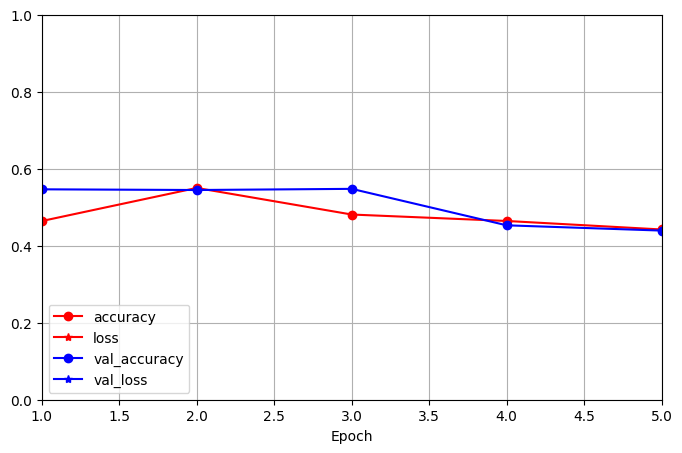

In [9]:
his_model = model.fit(
    x=X_train_full,
    y=y_train_full,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[
        ks.callbacks.EarlyStopping(patience=4)
    ]
)


def plot_learning_curves(history):
    plt.figure(figsize=(8, 5))
    for key, style in zip(history.history, ["r-o", "r-*", "b-o", "b-*"]):
        epochs = np.array(history.epoch)
        plt.plot(epochs + 1, history.history[key], style, label=key)
    plt.xlabel("Epoch")
    plt.axis([1, len(history.history["loss"]), 0., 1])
    plt.legend(loc="lower left")
    plt.grid()


plot_learning_curves(his_model)

### 1.6 Evaluate the Model

1. Use the evaluate() method to evaluate the model on the test set.
    - (a) What is the performance of the model on the test set
        > [1m313/313[0m [32m━━━━━━━━━━━━━━━━━━━━[0m[37m[0m [1m2s[0m 6ms/step - accuracy: 0.3482 - loss: 1106232.2500
        > Test Loss: 1106232.25
        > Test Accuracy: 34.82%


In [10]:
result = model.evaluate(X_test, y_test)
# Results is een lijst: [loss, accuracy]
print(f"Test Loss: {result[0]}")
print(f"Test Accuracy: {result[1] * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4322 - loss: 9845.0234
Test Loss: 9845.0234375
Test Accuracy: 43.22%


2. Write a function with the following signature:


In [11]:
def get_predictions(model, X, keepdims=False):
    """
    model: a keras model
    X: tensor of shape (batch_size,height,width,channels)
    keepdims: if True,the output tensor has rank 2, otherwise it has rank 1

    Returns: the predictions for X either as (batch_size,) or (batch_size,1)
    """
    y_pred = model.predict(X)
    return ks.ops.argmax(y_pred, axis=1, keepdims=keepdims)

This function should return the actual class predictions made by the model.
This function should have at most two lines of code.


3. Use the method above to check the accuracy of the model on the validation set by comparing the output of this method to y_valid.
    - (a) You should recognize this number from the output produced by the `fit()` method.


In [12]:
y_valid_pred = get_predictions(model, X_val, keepdims=True)
print(ks.ops.mean(y_valid_pred == y_val))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
tf.Tensor(0.4393, shape=(), dtype=float32)


4. Write a function that identifies incorrectly classified images:


In [13]:
def get_incorrectly_predicted_images(model, X, y_true):
    """
    model: the trained model
    X: tensor of shape (n, image_shape), the images
    y_true: actual labels (n, 1) (or (n,))

    Returns: three tensors of shape (m, image_shape), (m,), (m,)
        incorrectly_classified_images, predicted_labels, expected_labels
    """
    assert X.shape[0] == y_true.shape[0], "dimensions wrong"
    y_pred = get_predictions(model, X, keepdims=y_true.ndim == 2)

    # ? Neem de array met incorrecte voorspellingen
    selector = (ks.ops.squeeze(y_pred) != ks.ops.cast(
        ks.ops.squeeze(y_true), y_pred.dtype))

    return X[selector], ks.ops.squeeze(y_pred[selector]), ks.ops.squeeze(y_true[selector])

5. Apply the above function to the test set and plot a 5 by 5 grid showing 25 wrongly classified images. Show both the predicted and the actual class sabove each image.

In [14]:
incorrectly_classified_images, predicted_labels, expected_labels = (
    get_incorrectly_predicted_images(model, X_test, y_test)
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [15]:
incorrectly_classified_images.shape,predicted_labels.shape,expected_labels.shape

((5678, 32, 32, 3), TensorShape([5678]), TensorShape([5678]))

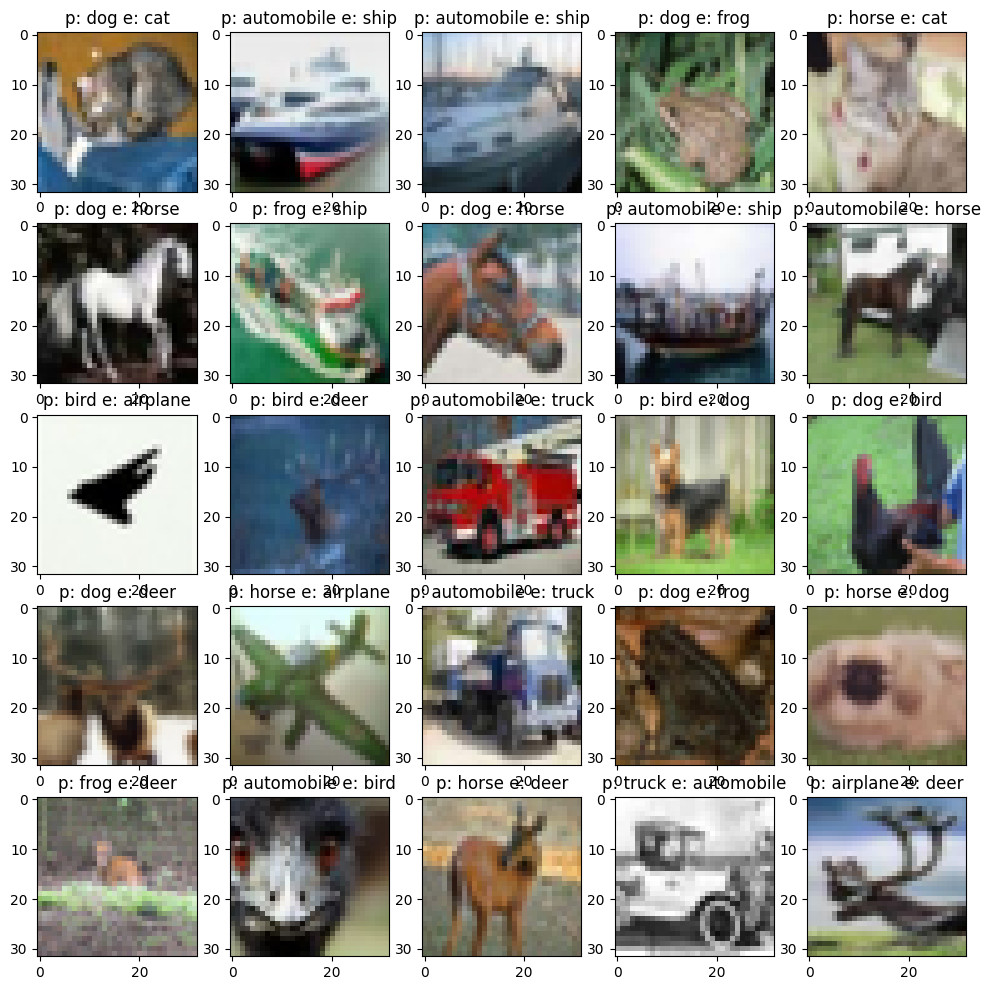

In [16]:
plt.figure(figsize=(12,12))

for i in range(25):
    ax = plt.subplot(5,5 ,i +1)
    plt.imshow(incorrectly_classified_images[i])
    plt.title(f"p: {class_names[predicted_labels[i]]} e: {class_names[expected_labels[i]]}")

6. Finally, use a tensorflow method to create a confusion matrix for the test set. The rows should contain the actual classes, the columns are the predicted classes. Use the code below to display the confusion matrix.


In [17]:
import tensorflow as tf
import seaborn as sns
cm = tf.math.confusion_matrix(
    y_test.squeeze(),
    get_predictions(model,X_test)
)
cm


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[687, 102,  55,   0,   0,  29,   9,  34,  31,  53],
       [ 17, 901,   2,   0,   0,  22,   2,   5,   5,  46],
       [177,  61, 170,   4,   0, 327,  94, 149,   3,  15],
       [ 76, 121,  54,  16,   0, 504,  83, 124,   0,  22],
       [ 77,  81,  70,   3,   9, 343, 125, 282,   2,   8],
       [ 43,  50,  51,   9,   0, 630,  38, 159,   4,  16],
       [ 22, 112,  36,   1,   0, 341, 435,  34,   1,  18],
       [ 29,  49,   5,   1,   1, 179,  15, 668,   2,  51],
       [244, 248,  14,   1,   0,  33,   7,  25, 392,  36],
       [ 48, 448,   4,   0,   0,  43,  11,  23,   9, 414]], dtype=int32)>

[Text(0, 0.5, 'airplane'),
 Text(0, 1.5, 'automobile'),
 Text(0, 2.5, 'bird'),
 Text(0, 3.5, 'cat'),
 Text(0, 4.5, 'deer'),
 Text(0, 5.5, 'dog'),
 Text(0, 6.5, 'frog'),
 Text(0, 7.5, 'horse'),
 Text(0, 8.5, 'ship'),
 Text(0, 9.5, 'truck')]

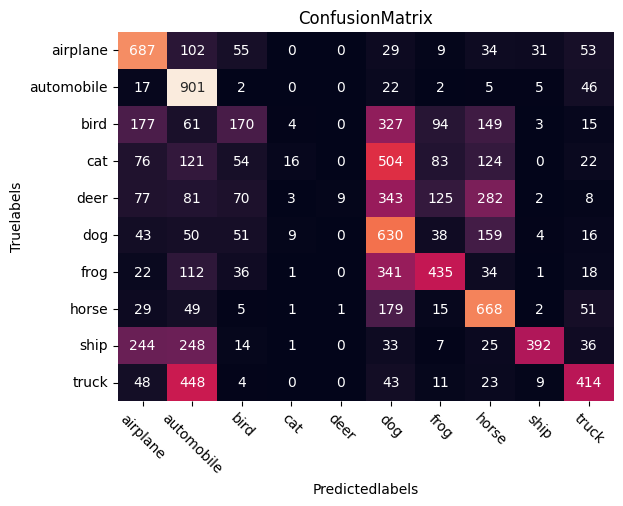

In [18]:
ax = plt.subplot()
# annot=Truetoannotatecells,ftm="g"todisablescientificnotation
sns.heatmap(cm, annot=True, fmt="g", ax=ax, cbar=False)
# labels,titleandticks
ax.set_xlabel("Predictedlabels")
ax.set_ylabel("Truelabels")
ax.set_title("ConfusionMatrix")
ax.xaxis.set_ticklabels(class_names, rotation=-45)
ax.yaxis.set_ticklabels(class_names, rotation=0)

### 1.7  Try to Improve the Model
Try to improve the model (i.e. try to achieve a higher accuracy). Things youcould try:
- Add an additional convolutional block.
- Add dropout to the network to prevent overfitting. See Chapter 11.
- Try different initialization of the weights.
- Try to continue the training with a decreased learning rate.
- Use Monte Carlo dropout to make predictions.

In [25]:
def get_model():
    return ks.Sequential([
        # * Input shape (32,32,3)
        ks.layers.Input(shape=(32, 32, 3), name="input"),

        # * Rescaling layer [0,1]
        ks.layers.Rescaling(scale=1./255, name="rescale"),

        # * Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        #* Conv layer 32 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=32,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2), name="maxpool_1"),

        #! Dropout layer with rate 0.2
        ks.layers.Dropout(0.2),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        # * Conv layer 64 filters, kernel (3,3), padding same, activatie ReLU
        ks.layers.Conv2D(filters=64,
                         kernel_size=(3, 3),
                         padding="same",
                         activation="relu"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),

        # * MaxPool layer pool size (2,2)
        ks.layers.MaxPool2D(pool_size=(2, 2),
                            name="maxpool_2"),

        #! Dropout layer with rate 0.3
        ks.layers.Dropout(0.3),

        # * Flatten layer
        ks.layers.Flatten(name="flatten"),

        # * Dense layer
        ks.layers.Dense(units=128,
                        activation="relu",
                        name="dense"),

        #! BatchNormalization layer
        ks.layers.BatchNormalization(),
        #! Dropout layer with rate 0.5
        ks.layers.Dropout(0.5),
        # * Output Dense layer
        ks.layers.Dense(units=10,
                        activation="softmax",
                        name="output"),])


model = get_model()


In [26]:

model.compile(
    optimizer=ks.optimizers.Adam(learning_rate=1/1000),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.4639 - loss: 1.5518 - val_accuracy: 0.5911 - val_loss: 1.1742
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6196 - loss: 1.0775 - val_accuracy: 0.6223 - val_loss: 1.0748
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.6719 - loss: 0.9431 - val_accuracy: 0.6993 - val_loss: 0.8511
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7038 - loss: 0.8602 - val_accuracy: 0.7445 - val_loss: 0.7171
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7242 - loss: 0.8043 - val_accuracy: 0.7865 - val_loss: 0.6057
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7361 - loss: 0.7639 - val_accuracy: 0.7368 - val_loss: 0.7570
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.7531 - loss: 0.7206 - val_accuracy: 0.7878 - val_loss: 0.6099
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 

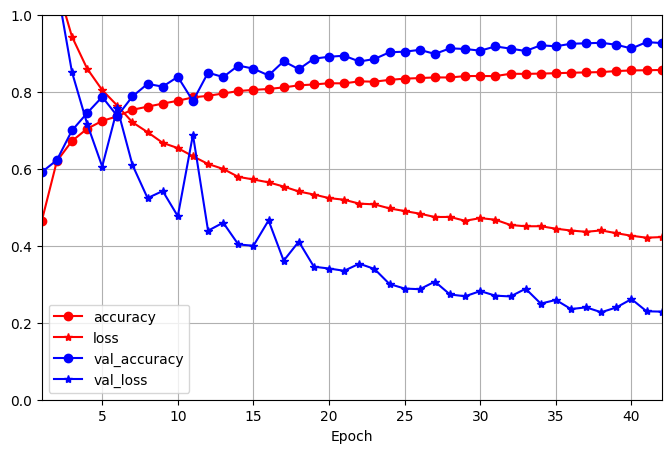

In [27]:

his_model = model.fit(
    x=X_train_full,
    y=y_train_full,
    epochs=100,
    validation_data=(X_val, y_val),
    callbacks=[
        ks.callbacks.EarlyStopping(patience=4)
    ]
)
plot_learning_curves(his_model)